In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv('data/titanic_train.csv')
df_test = pd.read_csv('data/titanic_test.csv')

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

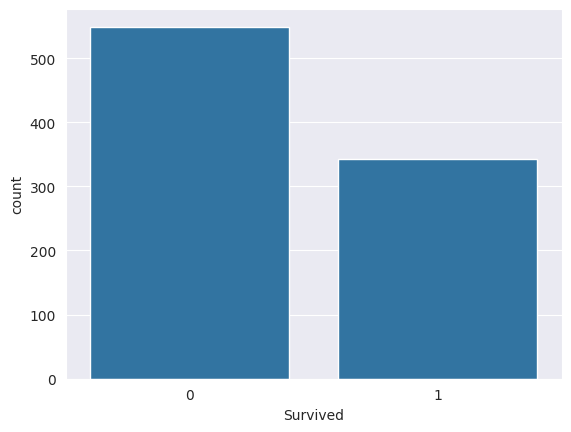

In [110]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

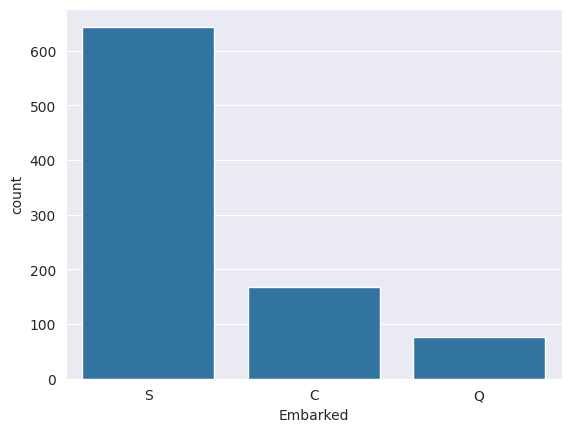

In [111]:
sns.countplot(x='Embarked', data=df)

In [112]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [113]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [114]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df = df.dropna()

In [115]:
estimators = [
    ('rfc', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42, gamma=0.1, C=100)))
]
X, y = df.drop('Survived', axis=1), df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))
model.fit(X_train, y_train)

StackingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=42)),
                               ('svc',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(C=100, gamma=0.1,
                                                     random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42))

In [116]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        87
           1       0.72      0.72      0.72        47

    accuracy                           0.81       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.81      0.81      0.81       134



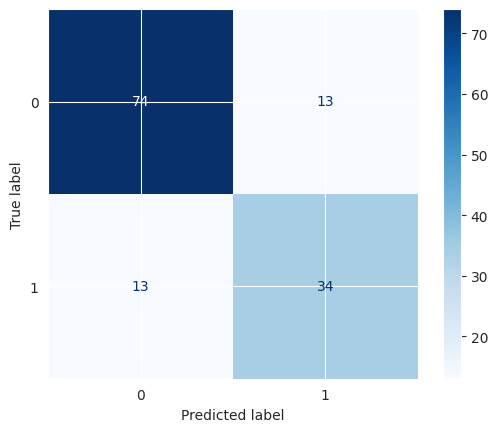

In [117]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
print(classification_report(y_test, model.predict(X_test)))